# 3 A Tour of Machine Learning Classifiers Using Schikit-Learn

**Overview**

- [3.1 Chosing a classification algorithm](#3.1-Chosing-a-classification-algorithm)
- [3.2 First steps w/ scikit-learn](#3.2-First-steps-w/-scikit-learn)
- [3.3 Modeling class probabilisties via logistic regression](#3.3-Modeling-class-probabilisties-via-logistic-regression)
    - [3.3.1 Logistic regression intuition & conditional probabilities](#3.3.1-Logistic-regression-intuition-&-conditional-probabilities)
    - [3.3.2 Learning the weights of the logistic cost function](#3.3.2-Learning-the-weights-of-the-logistic-cost-function)
    - [3.3.3](#3.3.3)
    - [3.3.4 Training a logistic regression model w/ scikit-learn](#3.3.4-Training-a-logistic-regression-model-w/-scikit-learn)
    - [3.3.5 Tacking overfitting via regularization](#3.3.5-Tacking-overfitting-via-regularization)
- [3.4 Maximum margin classifcation w/ support vector machines](#3.4-Maximum-margin-classifcation-w/-support-vector-machines)
    - [3.4.1 Maximum margin intuition](#3.4.1-Maximum-margin-intuition)
    - [3.4.2 Dealing w/ the nonlinearly separable case using slack variables](#3.4.2-Dealing-w/-the-nonlinearly-separable-case-using-slack-variables)
- [3.5 Solving non-linear problems using a kernel SVM](#3.5-Solving-non-linear-problems-using-a-kernel-SVM)
    - [3.5.1](#3.5.1)
    - [3.5.2 Using the kernel trick to find separating hyperplanes in higher dimensional space](#3.5.2-Using-the-kernel-trick-to-find-separating-hyperplanes-in-higher-dimensional-space)
- [3.6 Decision tree learning](#3.6-Decision-tree-learning)
    - [3.6.1 Maximizing information gain - getting the most bang for the buck](#3.6.1-Maximizing-information-gain-getting-the-most-bang-for-the-buck)
    - [3.6.2 Building a decision tree](#3.6.2-Building-a-decision-tree)
    - [3.6.3 Combining weak to strong learners via random forests](#3.6.3-Combining-weak-to-strong-learners-via-random-forests)
- [3.7 K-nearest neighbors - a lazy learning algorithm](#3.7-K-nearest-neighbors---a-lazy-learning-algorithm)

In [1]:
from IPython.display import Image
%matplotlib inline

**no free lunch theorem**

## 3.1 Chosing a classification algorithm

1. 特徴量を選択, training samplesを収集 chose features, colect samples
2. 性能指標を選択 index
3. 分類器と最適化アルゴリズムを選択
4. モデルの性能を評価
5. アルゴリズムを調整

## 3.2 First steps w/ scikit-learn

In [2]:
from sklearn import datasets
import numpy as np

# load Iris dataset
iris = datasets.load_iris()
# 3,4 col
X = iris.data[:, [2, 3]]
# class label 
y = iris.target
# output class label
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

# training data, test data
# test data: 30%
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=1, stratify=y)

- random_state=1 : 乱数シード
- stratify=y : 層化sampling; class labelの比率が入力data setと同じ

In [4]:
print('Labels counts in y: ', np.bincount(y))
print('Labels counts in y_train: ', np.bincount(y_train))
print('Labels counts in y_test: ', np.bincount(y_test))

Labels counts in y:  [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test:  [15 15 15]


scaling 

In [5]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

# mean, sd 
sc.fit(X_train)
# 
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.linear_model import Perceptron

# Epochs 40; Learning rate 0.1
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
# fit to training data
ppn.fit(X_train_std, y_train)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [7]:
# predict test data
y_pred = ppn.predict(X_test_std)
# error samples 
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [8]:
from sklearn.metrics import accuracy_score

# accuracy
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # marker, colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot decision region
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # grid point 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    # features -> 1d-array
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # -> data size
    Z = Z.reshape(xx1.shape)
    
    # plot: grid point 
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # axis limit 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot: samples per class 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        
    # test sample
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidth=1,
                   marker='o',
                   s=100,
                   label='test set')

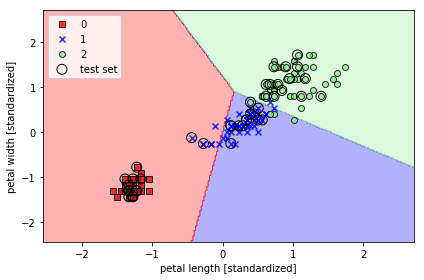

In [10]:
# training data, test data 結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# class label を結合
y_combined = np.hstack((y_train, y_test))

# plot: decision regions
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                     test_idx=range(105, 150))

# axis label
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# legend
plt.legend(loc='upper left')
# plot
plt.tight_layout()
plt.show()

> ---
> 
> - [scikit-learn/stable](http://scikit-learn.org/stable/)
> 
> ---

## 3.3 Modeling class probabilisties via logistic regression

**Logistic regression**
: 線形分類問題, 二値分類問題の分類問題に対するモデル

### 3.3.1 Logistic regression intuition & conditional probabilities

**odds ratio**

<!--logit(p) = log p / (1-p)-->
$$logit(p) = \log \frac{p}{(1-p)}$$
(3.3.1)

<!--logit(p(y = 1|x))
= woxo + w1x1 + ... + wmxm
= Σwixi
= w^T^x-->

$$logit(p(y = 1 | x))\\
= w_0x_0 + w_1x_1 + ... + w_mx_m\\
= \sum_{i=0}^m w_ix_i\\
= w^Tx$$
(3.3.2)

- class label が class 1に属する確率
- 特徴量の値と対数oddsの線形関係

**Logistric sigmoid fn**
: logistic fn の逆関数

<!--Φ(z) = 1 / 1+e^-z-->
$$\phi(z) = \frac{1}{1 + e^{-z}}$$
(3.3.3)

- z: net input

$$z = w^Tx$$
(3.3.4)

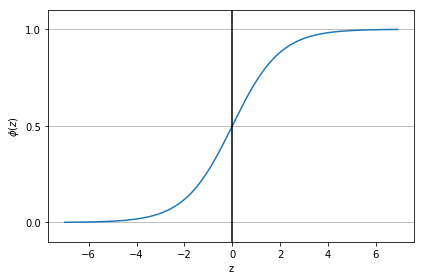

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# def: sigmoid fn 
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# 0.1間隔で, -7 ≤; < 7
z = np.arange(-7, 7, 0.1)

# exe: sigmoid fn
phi_z = sigmoid(z)

# plot: 
plt.plot(z, phi_z)
# 垂直線
plt.axvline(0.0, color='k')
# y limit
plt.ylim(-0.1, 1.1)
# axis label
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# ticks
plt.yticks([0.0, 0.5, 1.0])
# Axes class
ax = plt.gca()
# y axis grid line
ax.yaxis.grid(True)
# show
plt.tight_layout()
plt.show()

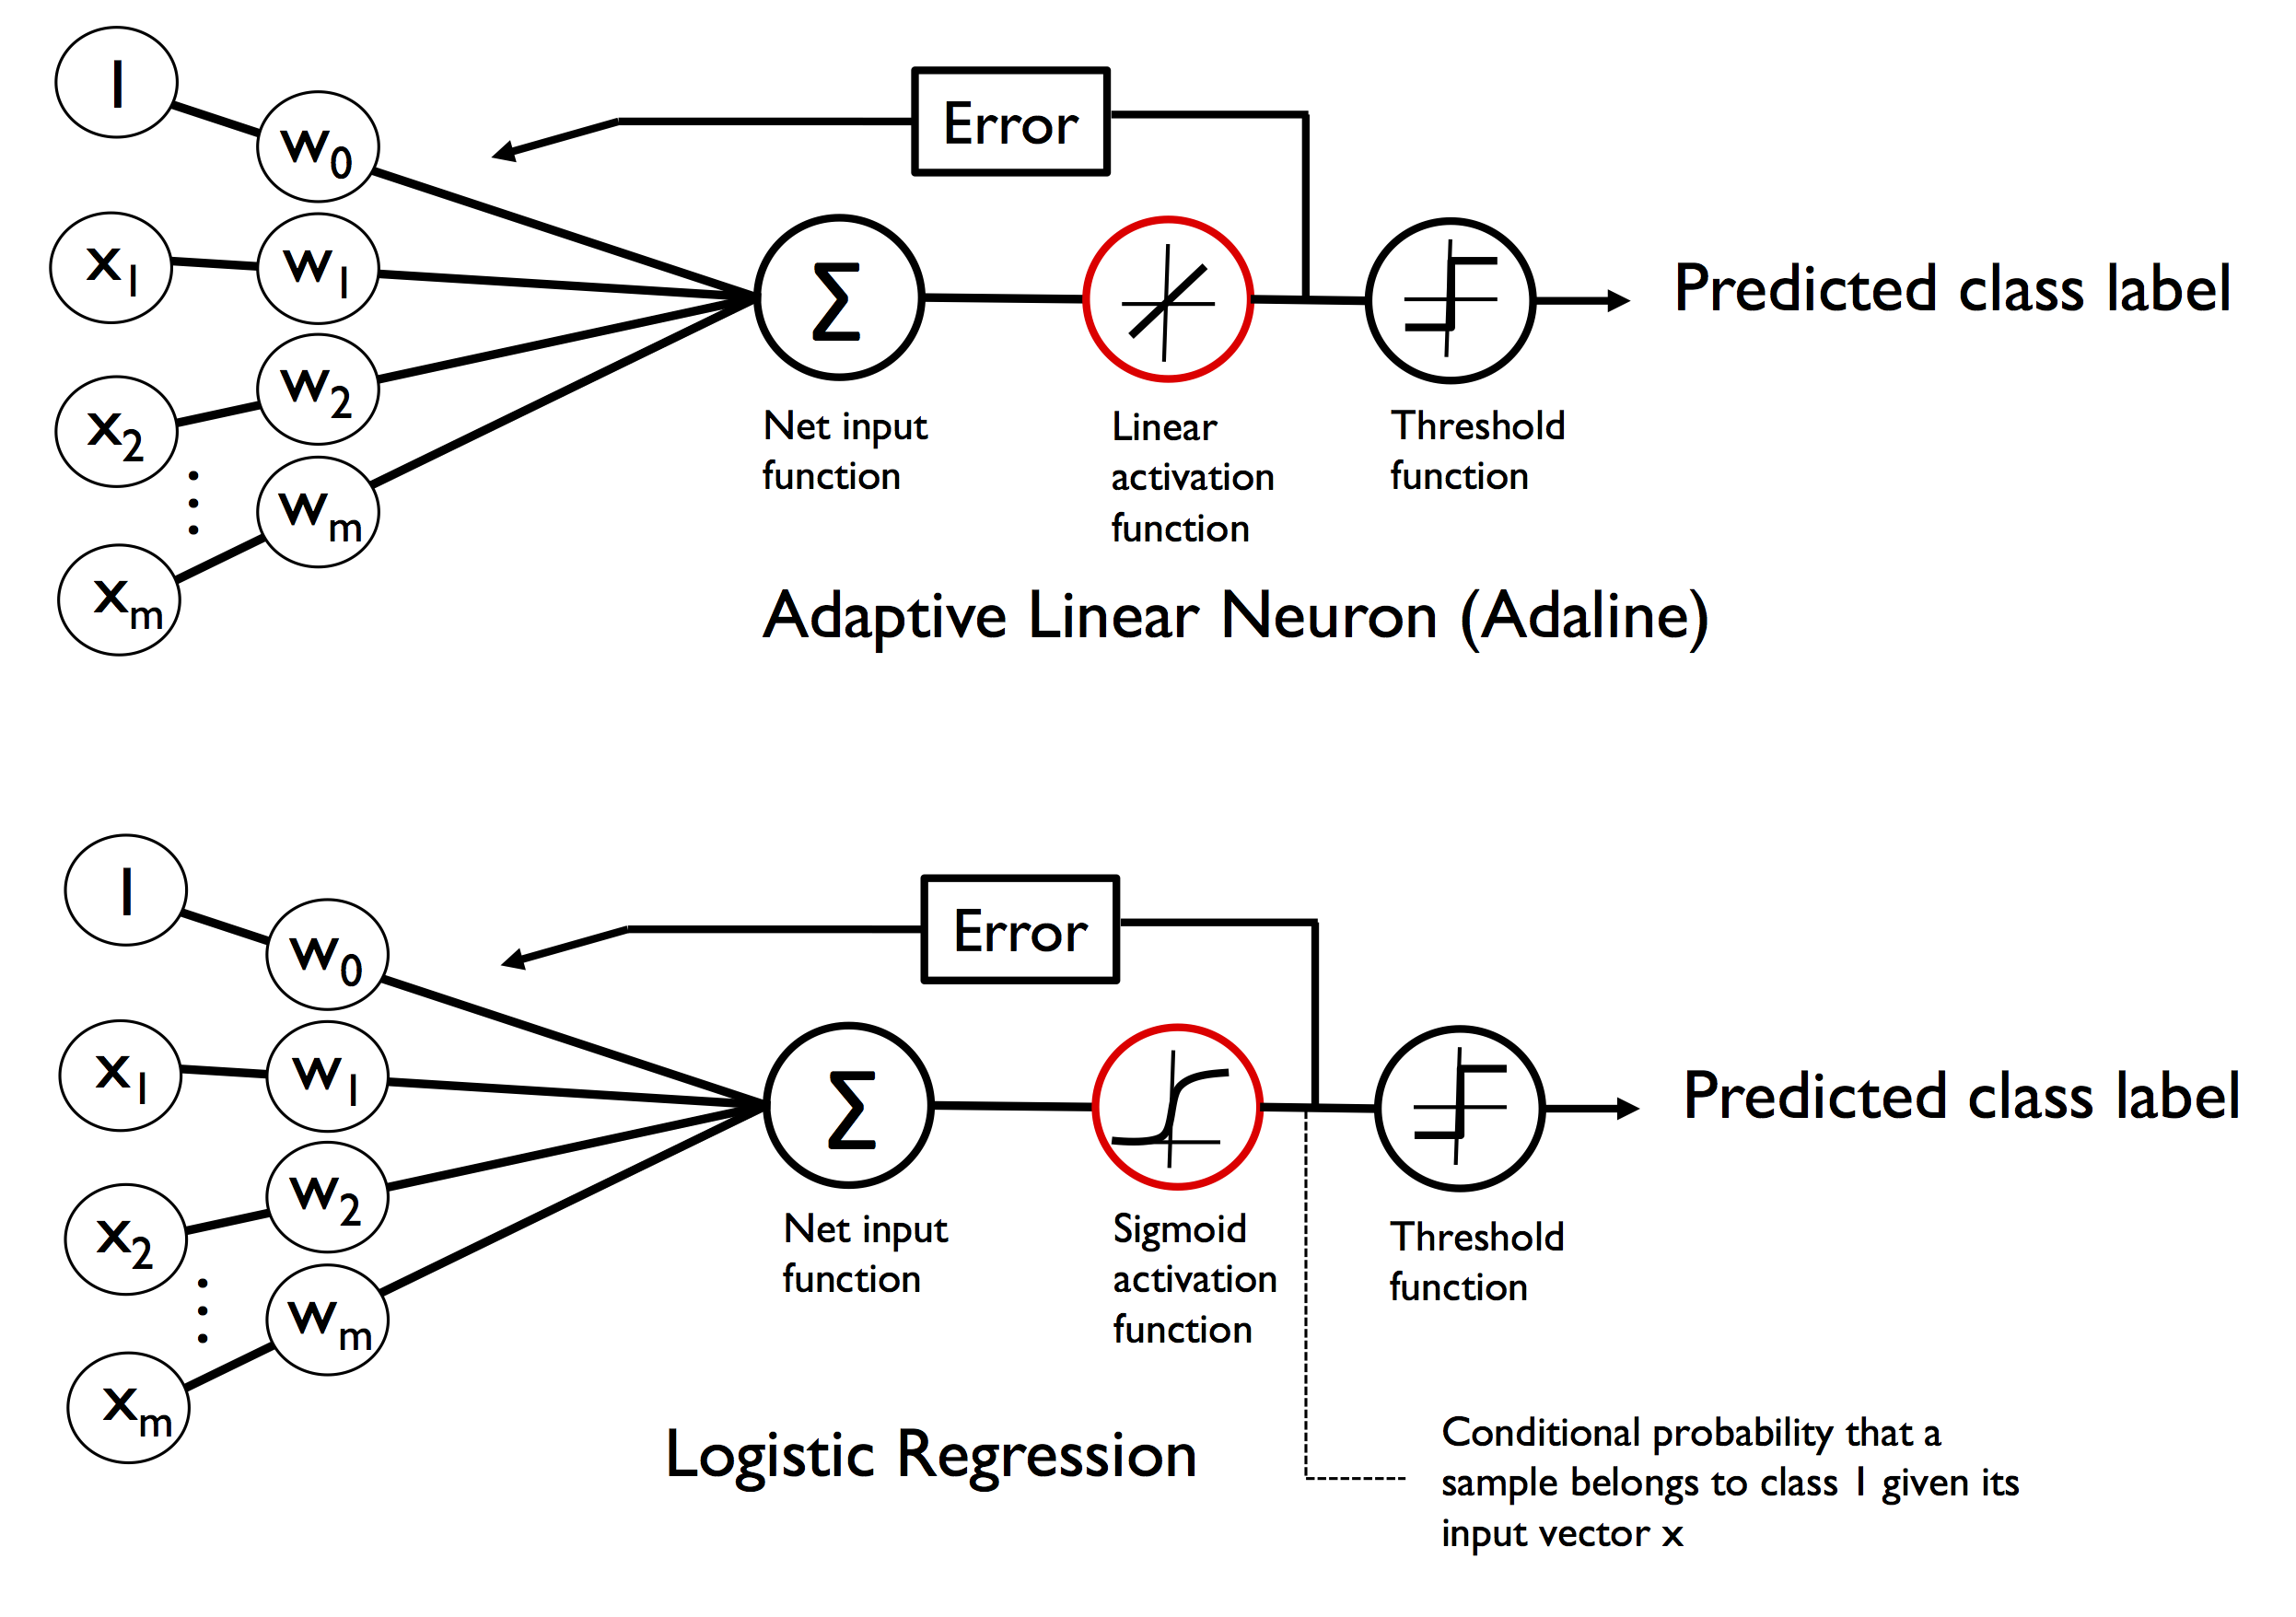

In [12]:
Image('img/03_03.png', width=500)

$$\phi(z) = P(y = 0|x; w)$$

$\phi(z) = 0.8$ の時, 
80%で, y=1

<!--
y^ =    1 Φ(z) ≥ 0.5
        0 Φ(z) < 0.5
-->
<!--
y^ =    1 z ≥ 0.0
        0 z < 0.0
-->

$$
\begin{align*}
\widehat{y} 
&= 
\begin{cases}
1 & \quad (\phi(z) \geq 0.5)\\
0 & \quad (\phi(z) \lt 0.5)
\end{cases} \\
\widehat{y} 
&= 
\begin{cases}
1 & \quad (z \geq 0.0)\\
0 & \quad (z \lt 0.0)
\end{cases}
\end{align*}
$$

### 3.3.2 Learning the weights of the logistic cost function

<!--J(w) = Σ1/2 (Φ(z^(i)^) - y^(i)^)^2-->
$$
J(w) = \sum_i \frac{1}{2} (\phi(z^{(i)}) - y^{(i)})^2
$$
(3.3.7)

L: Likelihood

<!--L(w) = P(y|x; w) 
= ΠP(y^(i)^|x^(i)^; w)
= Π(Φ(z^(i)^))^yi^ (1-Φ(zi))^1-y^-->

$$
\begin{align*}
L(w)
&= P(y | x; w)\\
&= \prod_{i=1}^n P(y^{(i)} | x^{(i)}; w)\\
&= \prod_{i=1}^n (\phi(z^{(i)})^{y^{(i)}}) (1 - \phi(z^{(i)}))^{1-y^{(i)}}
\end{align*}
$$

(3.3.8)

**log-likelihood fn** 

<!--l(w) = logL(w)
= Σ[-->

$$
\begin{align*}
l(w)
&= \log L(w) \\
&= \sum_{i=1}^n [y^{(i)} \log (\phi(z^{(i)}) + (1 - y^{(i)}) \log (1 - \phi (z^{(i)})) )]
\end{align*}
$$
(3.3.9)

log fnを用いて, 係数の積 -> 係数の和, 加算を用いて導関数に

Cost fn: J

$$
J(w) = \sum_{i=1}^n [-y^{(i)} \log(\phi(z^{(i)})) - (1 - y^{(i)}) \log(1 - \phi(z^{(i)}) ) ] 
$$
(3.3.10)

$$
J(\phi(z), y; w) = -y \log{(\phi(z))} - (1-y)\log{(1-\phi(z))}
$$
(3.3.11)

$$
J(\phi(z), y; w) = 
\begin{cases}
-\log{(\phi(z))} &\quad (y=1)\\
-\log{(1 - \phi(z))} &\quad (y=0)
\end{cases}
 $$

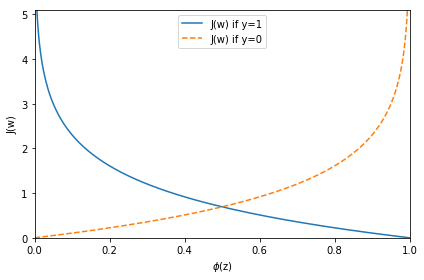

In [13]:
# y=1のコストを計算するfn
def cost_1(z):
    return - np.log(sigmoid(z))

# y=0 のコスト計算するfn
def cost_0(z):
    return - np.log(1 - sigmoid(z))

# 0.1間隔で-10≤; <10 のデータ生成
z = np.arange(-10, 10, 0.1)
# exe: sigmoid fn
phi_z = sigmoid(z)

# y=1 のcostを計算
c1 = [cost_1(x) for x in z]
# plot:
plt.plot(phi_z, c1, label='J(w) if y=1')

# y=0 のcostを計算
c0 = [cost_0(x) for x in z]
# plot:
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

# x axis, y axis limit
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
# axis label
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
# legend
plt.legend(loc='upper center')

# show
plt.tight_layout()
plt.show()

### 3.3.3 

Logistic regを実装するには, ADALINE の cost fn (J) を新たな cost fn に置換する

<!--J(w) = Σ[y^(i)^ log(Φ(z^i^) + (1-y^(i)^) log(1-Φ(z^(i)^)]-->
$$J(w) = -\sum_{i}[y^{(i)} \log{(\phi(z^{(i)}))} + (1 - y^{(i)}) \log{(1 - \phi(z^{(i)}))} ]$$
(3.3.13)



In [14]:
class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent

    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 & 1.0)
    n_iter : int
        Passes over the training datasets
    random_state : int
        Random num generator seed for random weight initialization


    Attributes
    ----------
    w_ : 1d-array
        weights after fitting
    cost_ : list
        sum-of-squares cost fn value in each spoch
    """

    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        # learning rate
        self.eta = eta
        # init traintin iteration
        self.n_iter = n_iter
        # random num seed を固定
        self.random_state = random_state

    def fit(self, X, y):
        """
        Fit training data

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the # of samples
            n_features is the # of features
        y : array-lile, shape = [n_samples]
            Target values

        Returns
        -------
        self : object

        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = - y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)

        return self

    def net_input(self, X):
        """
        Calculate net input
        """

        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """
        Compute logistic sigmoid activation
        """

        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """
        Return class label after unit step
        """

        return np.where(self.net_input(X) >= 0.0, 1, 0)

        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


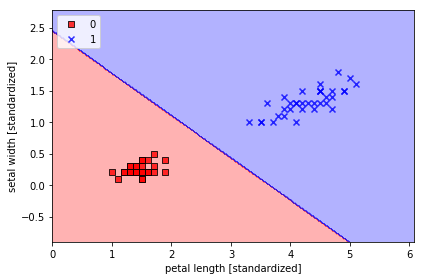

In [15]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

# logistic reg の instance を生成
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

# model fitting to training data
lrgd.fit(X_train_01_subset, y_train_01_subset)

# plot decision region
plot_decision_regions(X=X_train_01_subset,
                    y=y_train_01_subset,
                    classifier=lrgd)

# axis label
plt.xlabel('petal length [standardized]')
plt.ylabel('setal width [standardized]')
# legend
plt.legend(loc='upper left')

# plot
plt.tight_layout()
plt.show()

> ---
> 
> $$
\frac{\partial}{\partial{w_j}} l(w) 
= (y \frac{1}{\phi(z)} - (1-y) \frac{1}{(1-\phi(z))}) \frac{\partial}{\partial{w_j}} \phi(z)
$$
> (3.3.14)
> 
> $$
\begin{align*}
\frac{\partial}{\partial{z}} \phi(z) 
&= \frac{\partial}{\partial{z}} \frac{1}{1 + e^{-z}} \\
&= \frac{1}{1+e^{-z}} e^{-z} \\
&= \frac{1}{1+e^{-z}} (1 - \frac{1}{1 + e^{-z}})
\end{align*}
$$
> 
> (3.3.15)
> 
> (3.3.14) に対して, (3.3.15)で得られた$\frac{\partial}{\partial{z}} \phi(z) = \phi(z)(1-\phi(z))$を用いて,
> 
> 
> $$
\begin{align*}
(y\frac{1}{\phi(z)} - (1-y)\frac{1}{1 - \phi(z)}) \frac{\partial}{\partial{w_j}} \phi(z) 
&= (y \frac{1}{\phi(z)} - (1-y) \frac{1}{1-\phi(z)}) \phi(z) (1-\phi(z)) \frac{\partial}{\partial{w_j}} z \\
&= (y (1 - \phi(z)) - (1-y) \phi(z)) x_j \\
&= (y - \phi(z)) x_j
\end{align*}
$$
> 
> (3.3.16)
> 
> 
> $$
w_j := w_j + \eta \sum_{i=1}^n (y^{(i)} - \phi(z^{(i)})) x_j^{(i)}
$$
> 
> (3.3.17)
> 
> 
> $$
w := w + \Delta w
$$
> 
> (3.3.18)
> 
> 
> $$
\Delta w = \eta \nabla l(w)
$$
> 
> (3.3.19)
> 
> 
> $$
\begin{align*}
\Delta w_j 
&:= -\eta \frac{\partial{J}}{\partial{w_j}} \\
&= \eta \sum_{i=1}^n (y^{(i)} - \phi(z^{(i)})) x_j^{(i)} \\
w 
&:= w + \Delta w, \Delta w \\
&= - \eta \nabla j(w)
\end{align*}
$$
> 
> (3.3.20)
> 
> ---

### 3.3.4 Training a logistic regression model w/ scikit-learn

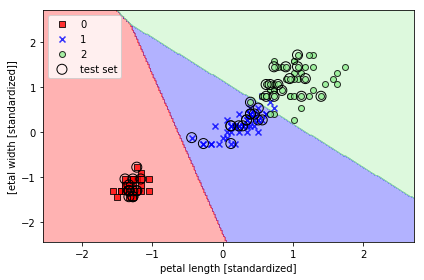

In [16]:
from sklearn.linear_model import LogisticRegression

# 
lr = LogisticRegression(C=100.0, random_state=1)

# training data fitting to model
lr.fit(X_train_std, y_train)

# plot: decision regions
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                     test_idx=range(105, 150))

# axis label
plt.xlabel('petal length [standardized]')
plt.ylabel('[etal width [standardized]]')

# legend 
plt.legend(loc='upper left')
# show
plt.tight_layout()
plt.show()

In [17]:
lr.predict_proba(X_test_std[:3, :])
# lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([[  3.20136878e-08,   1.46953648e-01,   8.53046320e-01],
       [  8.34428069e-01,   1.65571931e-01,   4.57896429e-12],
       [  8.49182775e-01,   1.50817225e-01,   4.65678779e-13]])

In [18]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [19]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [20]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### 3.3.5 Tacking overfitting via regularization

- **Overfitting**, **high variance**
- **Underfitting**, **high bias**

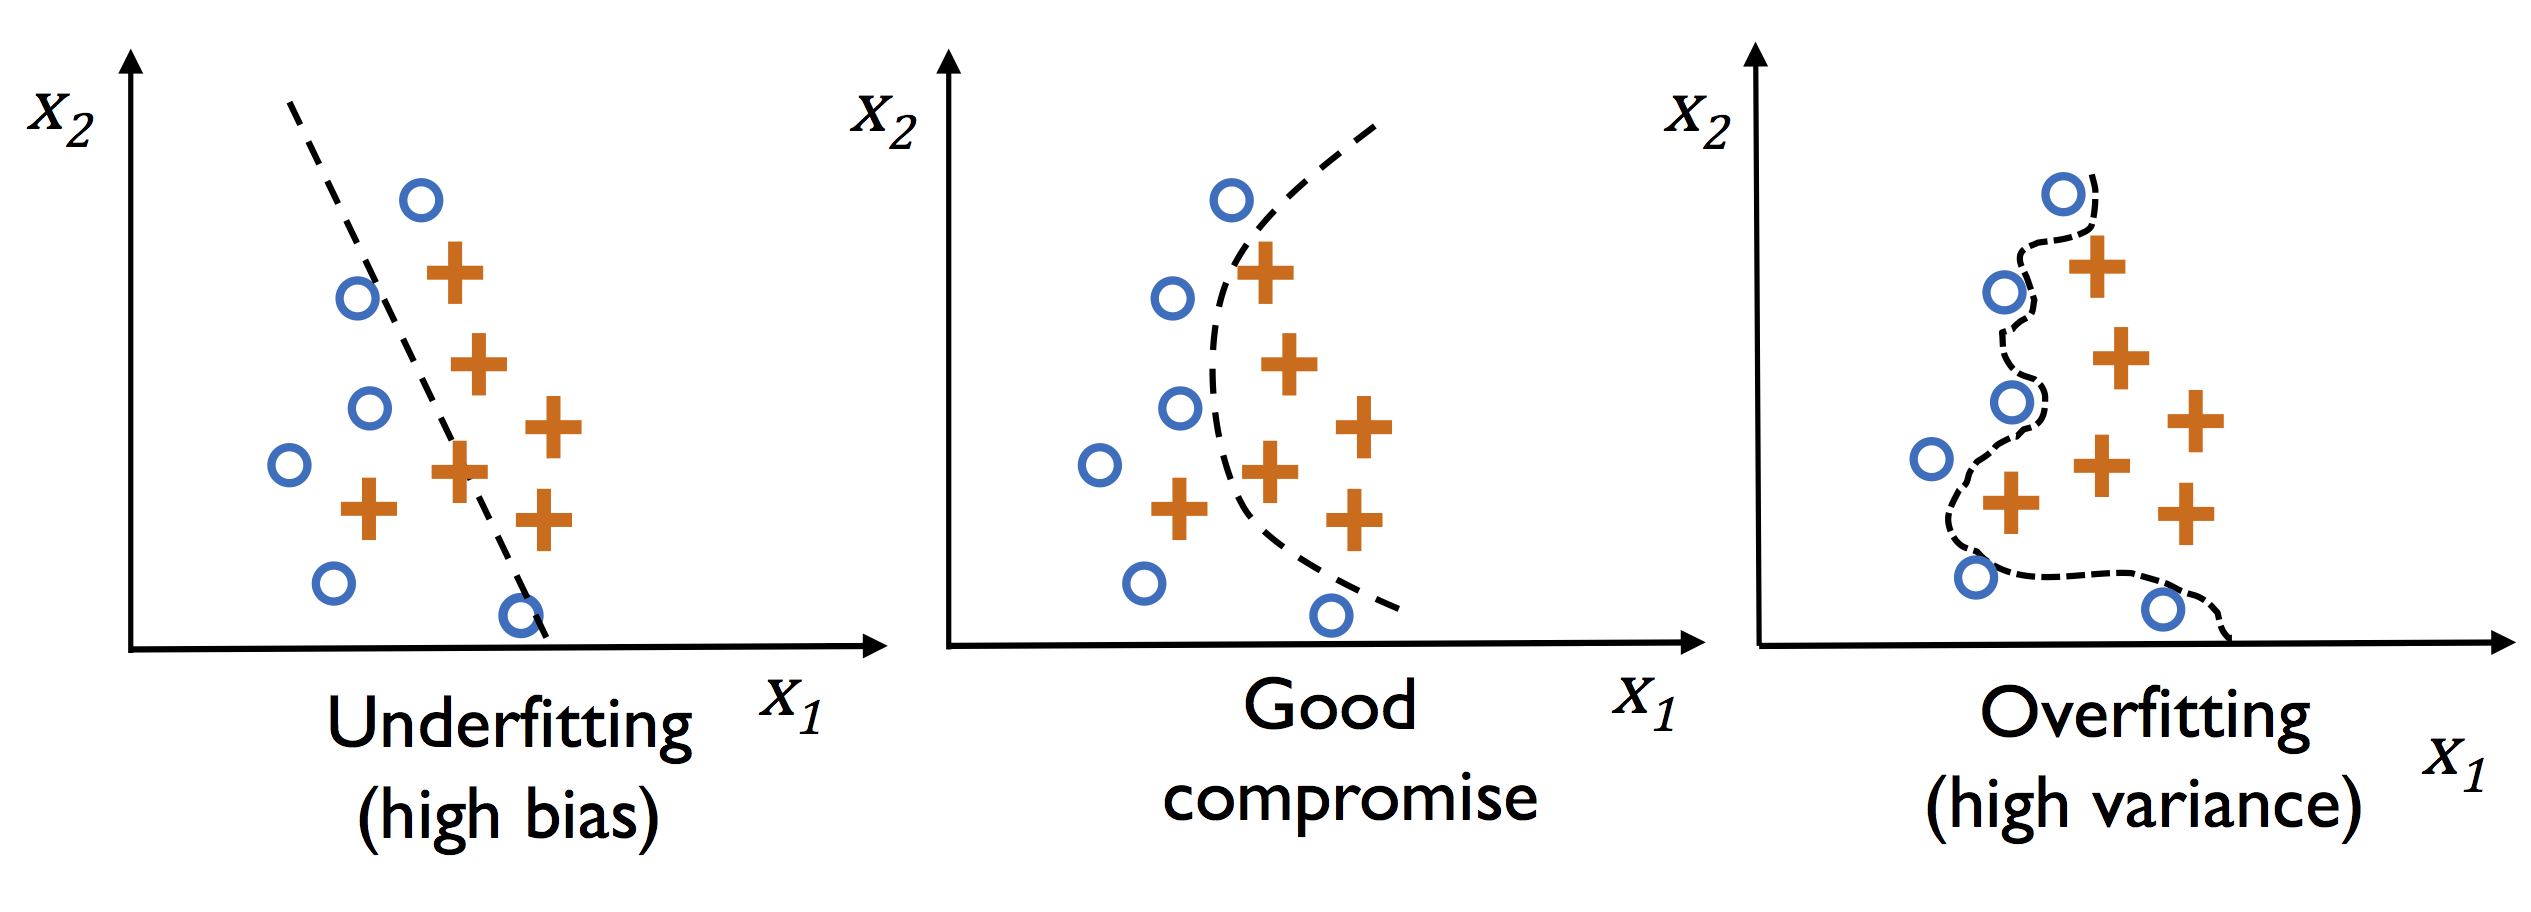

In [21]:
Image('img/03_07.png', width=500)

**variance**
: 予測の一貫性

**bias**

**colinearity**: featuresの間の相関の高さ

**Regularization**: 極端なparameterのweightにペナルティを科すためのbiasを導入する

**L2 Regularization** (L2 shrinkage, weightdecay)

<!--λ/2 ||w||^2 = λ/2 Σw^2j-->
$$\frac{\lambda}{2} ||w||^2 = \frac{\lambda}{2} \sum_{j=1}^m w_j^2$$
(3.3.21)

regularization parameter: λ

<!--J(w) = Σ[-yi log(Φ(zi)) - (1-yi) log(1-Φ(zi))] + λ/2||w||^2 -->   
$$J(w) = \sum_{i=1}^{m} [-y^{(i)} \log{(\phi(z^{(i)}))} - (1 - y^{(i)}) \log{(1 - \phi(z^{(i)}) )} ] + \frac{\lambda}{2} ||w||^2$$
(3.3.22)

<!--C = 1/λ-->
$$C = \frac{1}{\lambda}$$
(3.3.23)


<!--J(w) = C Σ[-yi log(Φ(zi)) - (1-yi) log(1-Φ(zi))] + 1/2||w||^2-->
$$J(w) = C \sum_{i=1}^{n} [-y^{(i)} \log{(\phi(z^{(i)}))} - (1 - y^{(i)}) \log{(1 - \phi(z^{(i)}))} ] + \frac{1}{2} ||w||^2$$
(3.3.24)

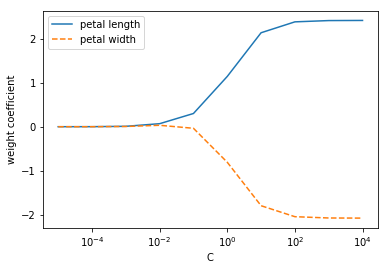

In [22]:
# empty list
weights, params = [], []

# 10の逆正則化parameterに対応するlogistic reg model を処理
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    
    # weight
    weights.append(lr.coef_[1])
    
    # 逆正則化parameterを格納
    params.append(10.**c)
    
# weight Numpy配列に変換
weights = np.array(weights)

# x axis に逆正則化parameter, y axisにweight
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
# x axis 対数
plt.xscale('log')

plt.show()

> ---
> 
> Logistric regression
> - [Scott Menard. (2009). Logistic Regression: From Introductory to Advanced Concepts and Applications](https://books.google.co.jp/books?id=eFOCz1tl_gQC&dq=scott+menard+logistic+regression:+&lr=&source=gbs_navlinks_s)
> 
> ---

## 3.4 Maximum margin classifcation w/ support vector machines

**Support vector machine** (SVM)

perceptron vs SVM
- perceptron: 誤分類率を最小化
- SVM: margin を最大化

- **Hyperplane**　(decision boudary)
- **Margin**: hyperplane と 最も近い training sample の間の距離
- **support vector**: hyperplane に最も近い training sample

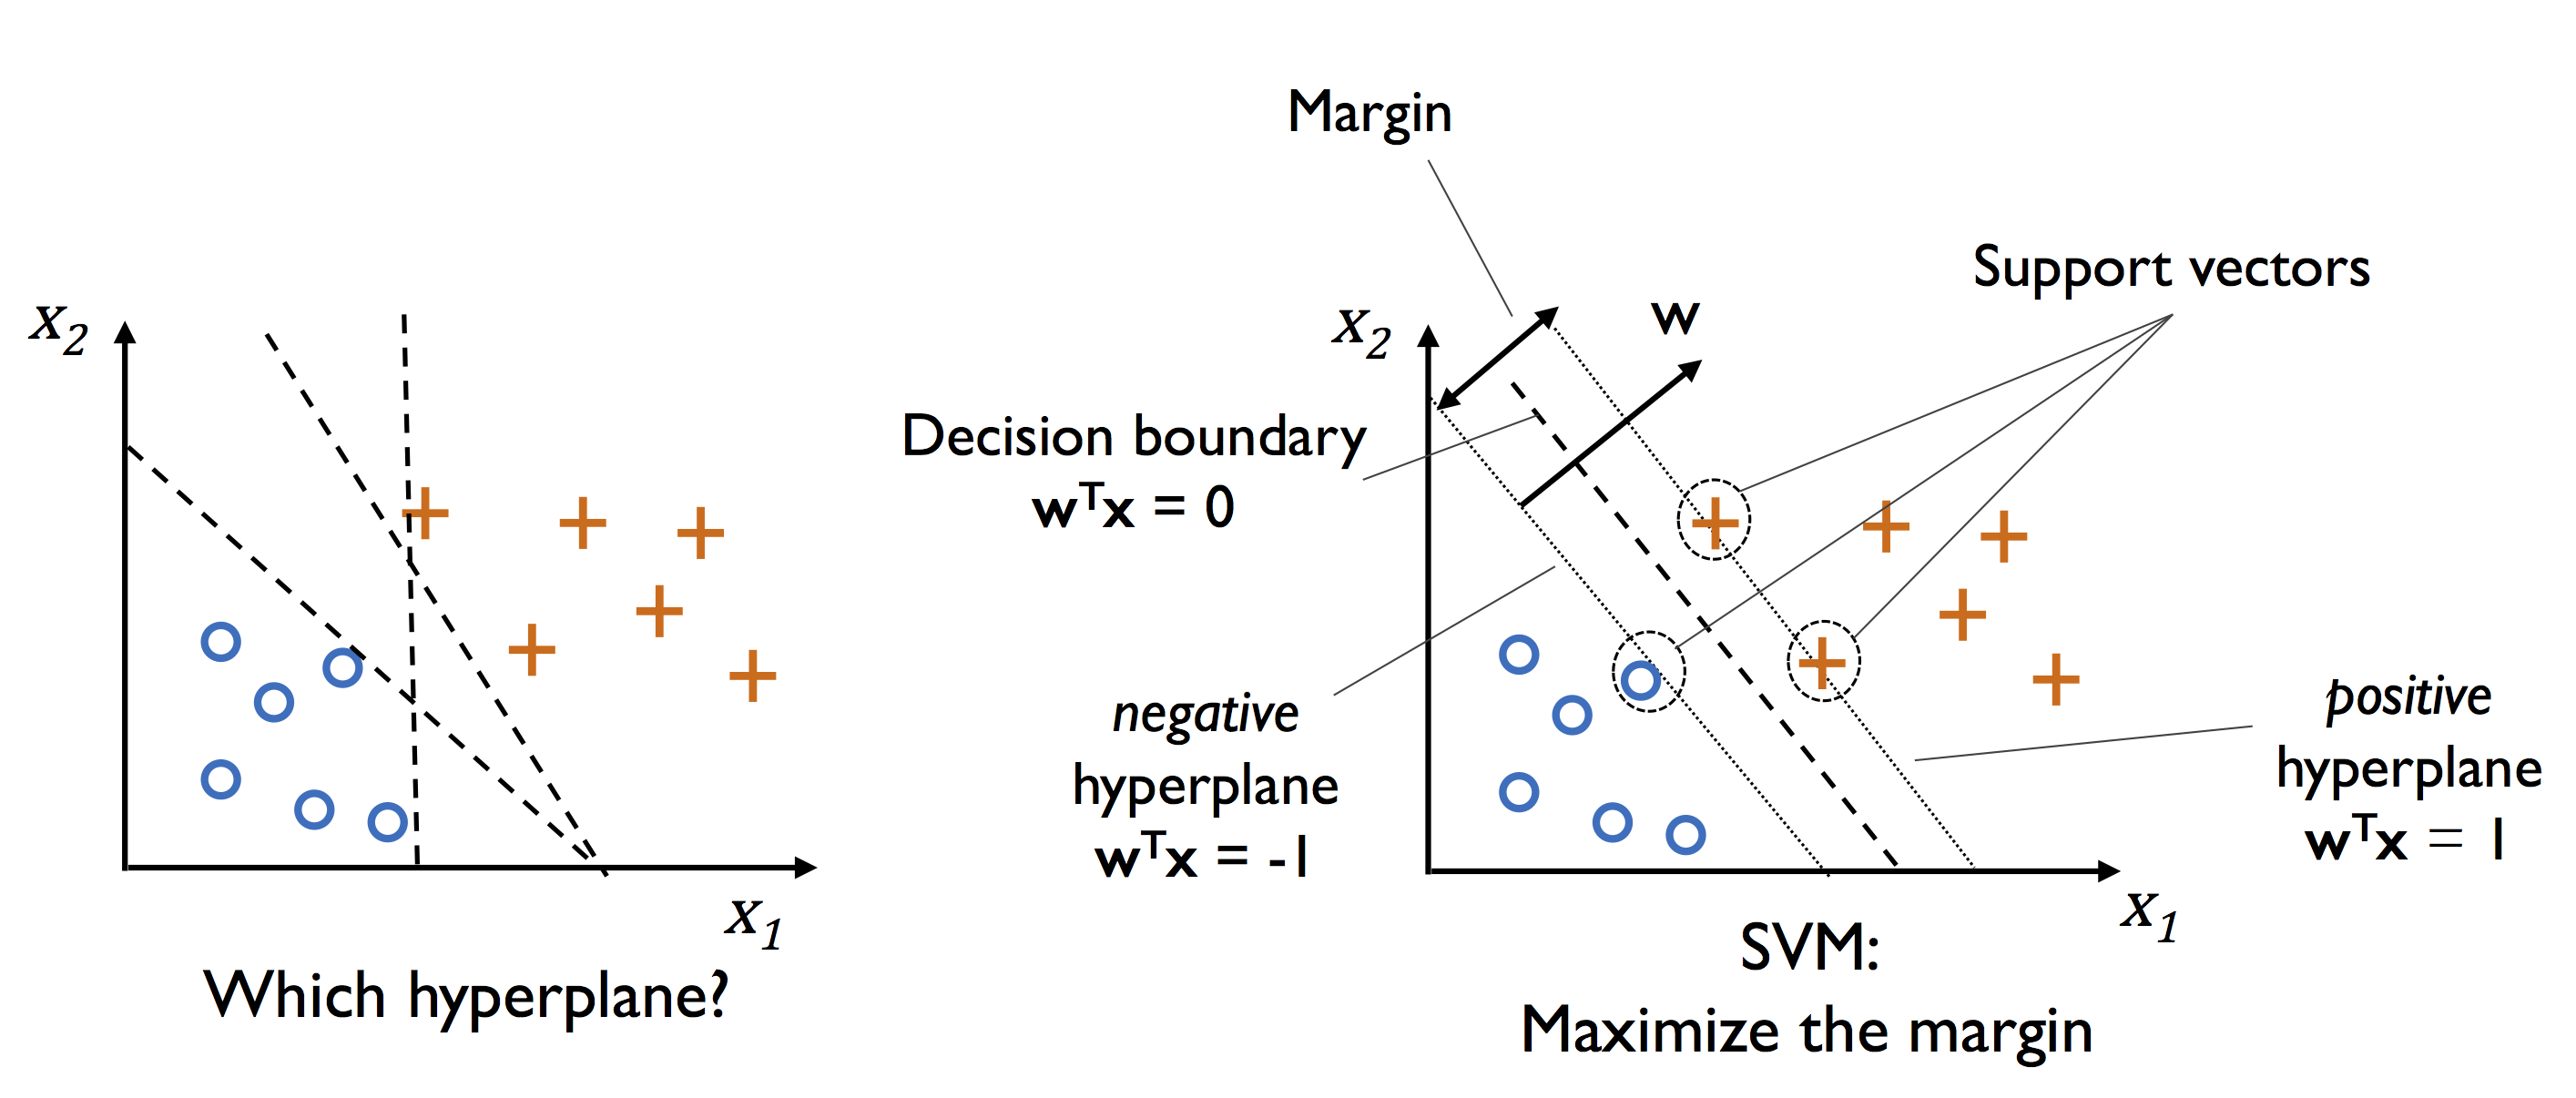

In [23]:
Image('img/03_09.png', width=500)

### 3.4.1 Maximum margin intuition

<!--w0 + w^T^ xpos = 1-->
$$w_0 + w^Tx_{pos} = 1$$
(3.4.1)

<!--w0 + w^T^xneg = -1-->
$$w_0 + w^Tx_{neg} = -1$$
(3.4.2)

<!--W^T^ (x~pos~ - x~neg~) = 2-->
$$\implies w^T (x_{pos} - x_{neg}) = 2$$
(3.4.3)

vector の長さ
<!--||w|| = sqrt(Σwj^2)-->
$$||w|| = \sqrt{\sum_{j=1}^m w_j^2}$$
(3.4.4)

<!--w^T^ (x~pos~ - x~neg~) / ||w|| = 2 / ||w||-->
$$\frac{w^T (x_{pos} - x_{neg})}{||w||} = \frac{2}{||w||}$$
(3.4.5)

<!--
w0 + w^T^xi ≥ 1    (yi = 1)    (3.4.6)
w0 + w^T^xi ≤ -1    (yi = -1)
i = i ... N
-->
$$
\begin{align*}
w_0 + w^Tx_{(i)} &\geq 1 &(y^{(i)} = 1)\\
w_0 + w^Tx^{(i)} &\leq -1 &(y^{(i)} = -1)
\end{align*} \\
i = 1 ... N
$$
(3.4.6)

- N: # of samples

<!--yi (w0 + w^T^xi) ≥ 1 ∀i-->
$$y^{(i)} (w_0 + w^Tx^{(i)}) \geq 1 ∀_i$$
(3.4.7)

<!--2/||w||--> $\frac{2}{||w||}$ を最大化するのではなく, <!--1/2||w||^2--> $\frac{1}{2}||w||^2$ を最小化する

- Ref: [Vapnik, V. (2013). The nature of statistical learning theory. Springer science & business media.](https://books.google.co.jp/books?hl=en&lr=&id=EqgACAAAQBAJ&oi=fnd&pg=PR7&dq=Vladimir+Vapnik,+The+Nature+of+Statistical+Learning+Theory&ots=g3F1ixbX34&sig=SA2N56D24_pBHMLBQSPcoc42mNw#v=onepage&q=Vladimir%20Vapnik%2C%20The%20Nature%20of%20Statistical%20Learning%20Theory&f=false)
- Ref.23: [Burges, C. J. (1998). A tutorial on support vector machines for pattern recognition. Data mining and knowledge discovery, 2(2), 121-167.](http://www.di.ens.fr/~mallat/papiers/svmtutorial.pdf)

### 3.4.2 Dealing w/ the nonlinearly separable case using slack variables

**slack var** ξ: 

**Soft-margin classification**

<!--
w0 + w^T^xi ≥ 1 - ξi    (yi = 1)
w0 + w^T^xi ≤ -1 + ξi    (yi = -1)
i = 1 ... N
-->
$$
\begin{align*}
w_0 + w^Tx^{(i)} &\geq 1 - \xi^{(i)} & (y^{(i)} = 1)\\
w_0 + w^Tx^{(i)} &\leq -1 + \xi^{(i)} & (y^{(i)} = -1)
\end{align*} \\
i = 1 ... N
$$
(3.4.8)

<!--1/2 ||w||^2 + C(Σξi)-->
$$\frac{1}{2}||w||^2 + C\Big(\sum_{i} \xi^{(i)}\Big)$$
(3.4.9)

C: error classification の penalty の制御

- &uarr;C &rArr; 
- &darr;C &rArr; 

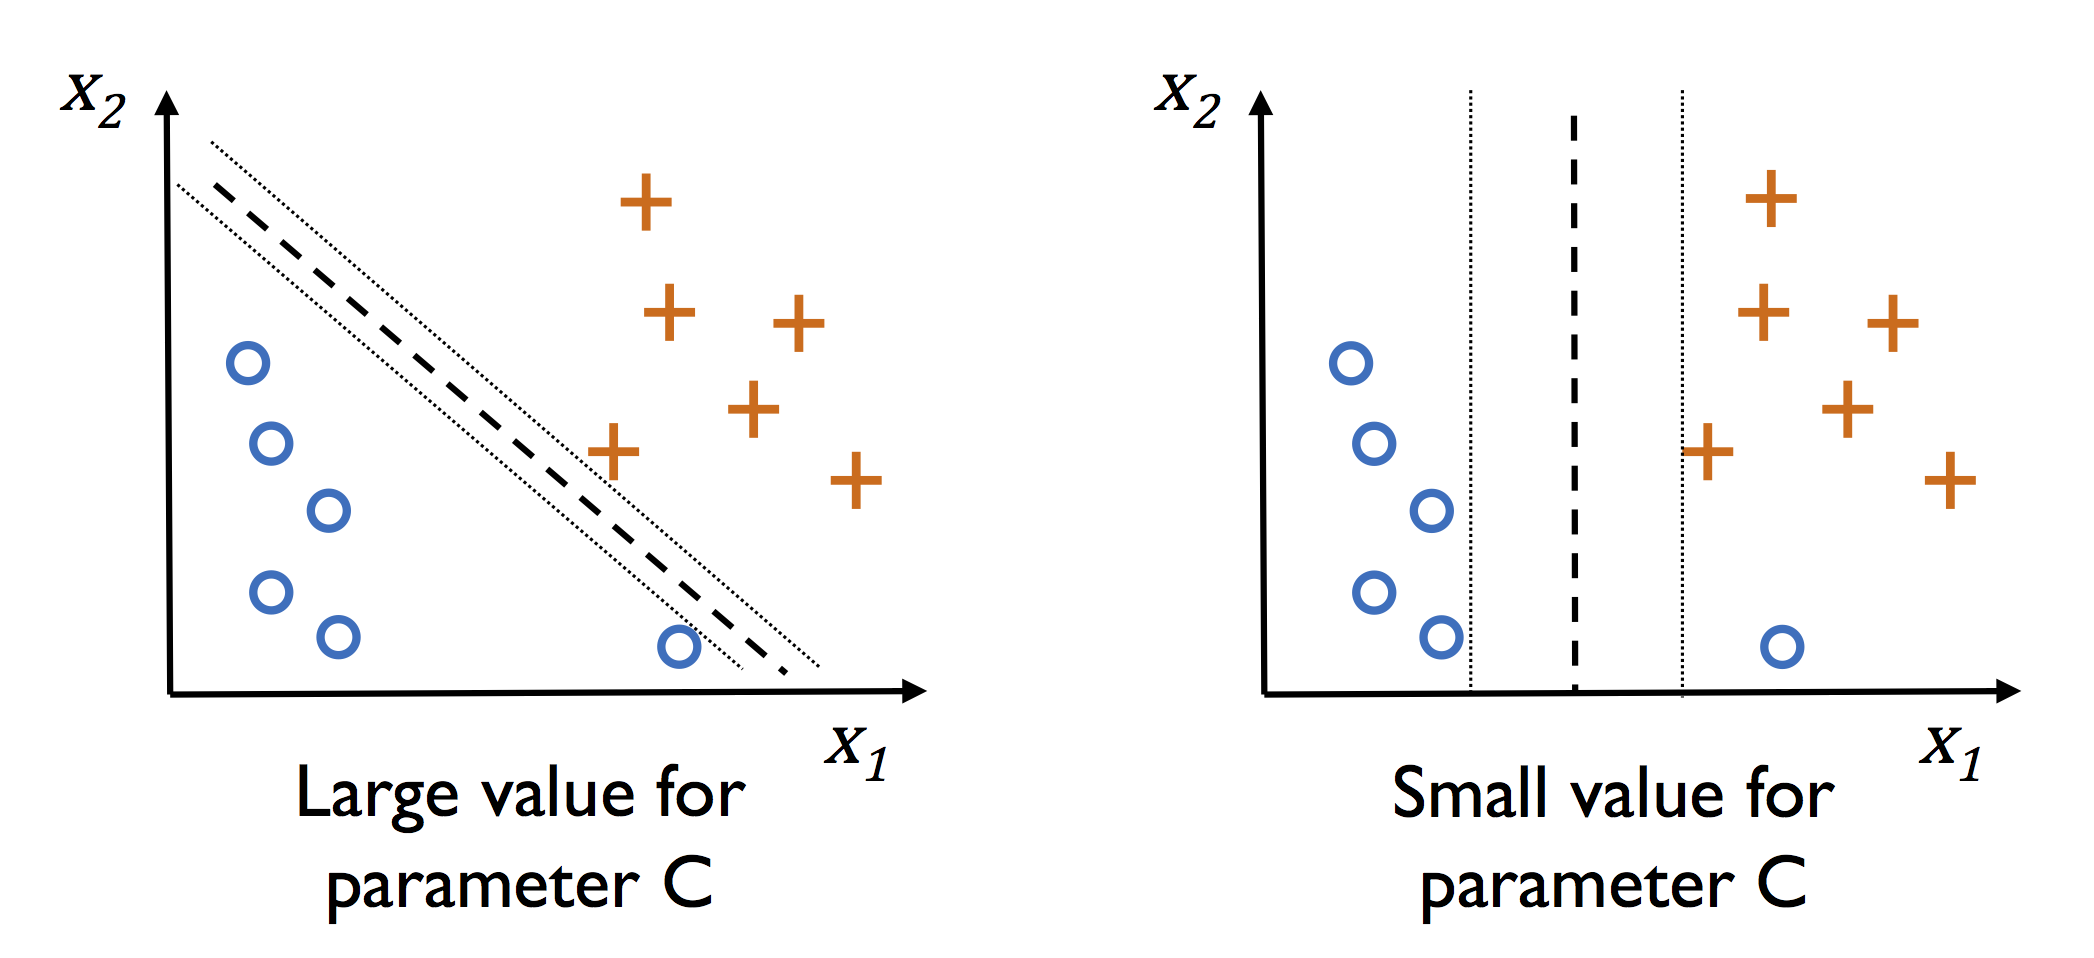

In [24]:
Image('img/03_10.png', width=500)

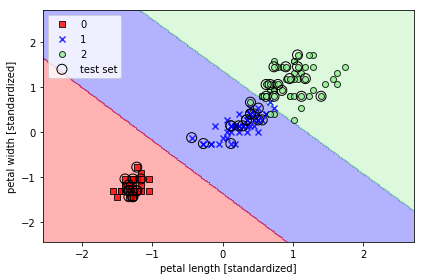

In [25]:
from sklearn.svm import SVC

# linear SVM 
svm = SVC(kernel='linear', C=1.0, random_state=1)

# fit to training data
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 3.4.3 Alternative implementation in scikit-learn 

- [LIBLINEAR](http://www.csie.ntu.edu.tw/~cjlin/liblinear/)
- [LIBSVM](http://www.csie.ntu.edu.tw/~cjlin/libsvm/)

In [26]:
from sklearn.linear_model import SGDClassifier

# stochastic GD ver の perceptron
ppn = SGDClassifier(loss='perceptron')

# stochastic GD ver の Logistic reg
lr = SGDClassifier(loss='log')

# stochastic ver の SVM
svm = SGDClassifier(loss='hinge')

## 3.5 Solving non-linear problems using a kernel SVM

SVM: kernel化が容易 **kernel SVM**

### 3.5.1 

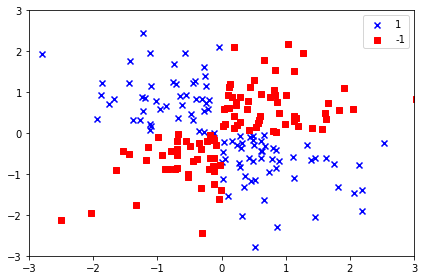

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# random num seed
np.random.seed(1)

# 標準正規分布に従う乱数で, 200 x 2 のmat
X_xor = np.random.randn(200, 2)
# 2 argに対して, 排他的論理和を実行
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)

# 排他的論理和の値が真の場合は1, 偽の場合は-1
y_xor = np.where(y_xor, 1, -1)

# label 1: blue x
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
           c='b', marker='x', label='1')
# label -1: red squre
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
           c='r', marker='s', label='-1')

# axis limit
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

この例は, 線形分離できない

射影fn *Φ*

<!--Φ(x1, x2) = (z1, z2, z3) 
= (x1, x2, x1^2+x2^2)-->
$$\phi(x_1, x_2) = (z_1, z_2, z_3)
= (x_1, x_2, x_1^2+x_2^2)$$
(3.5.1)

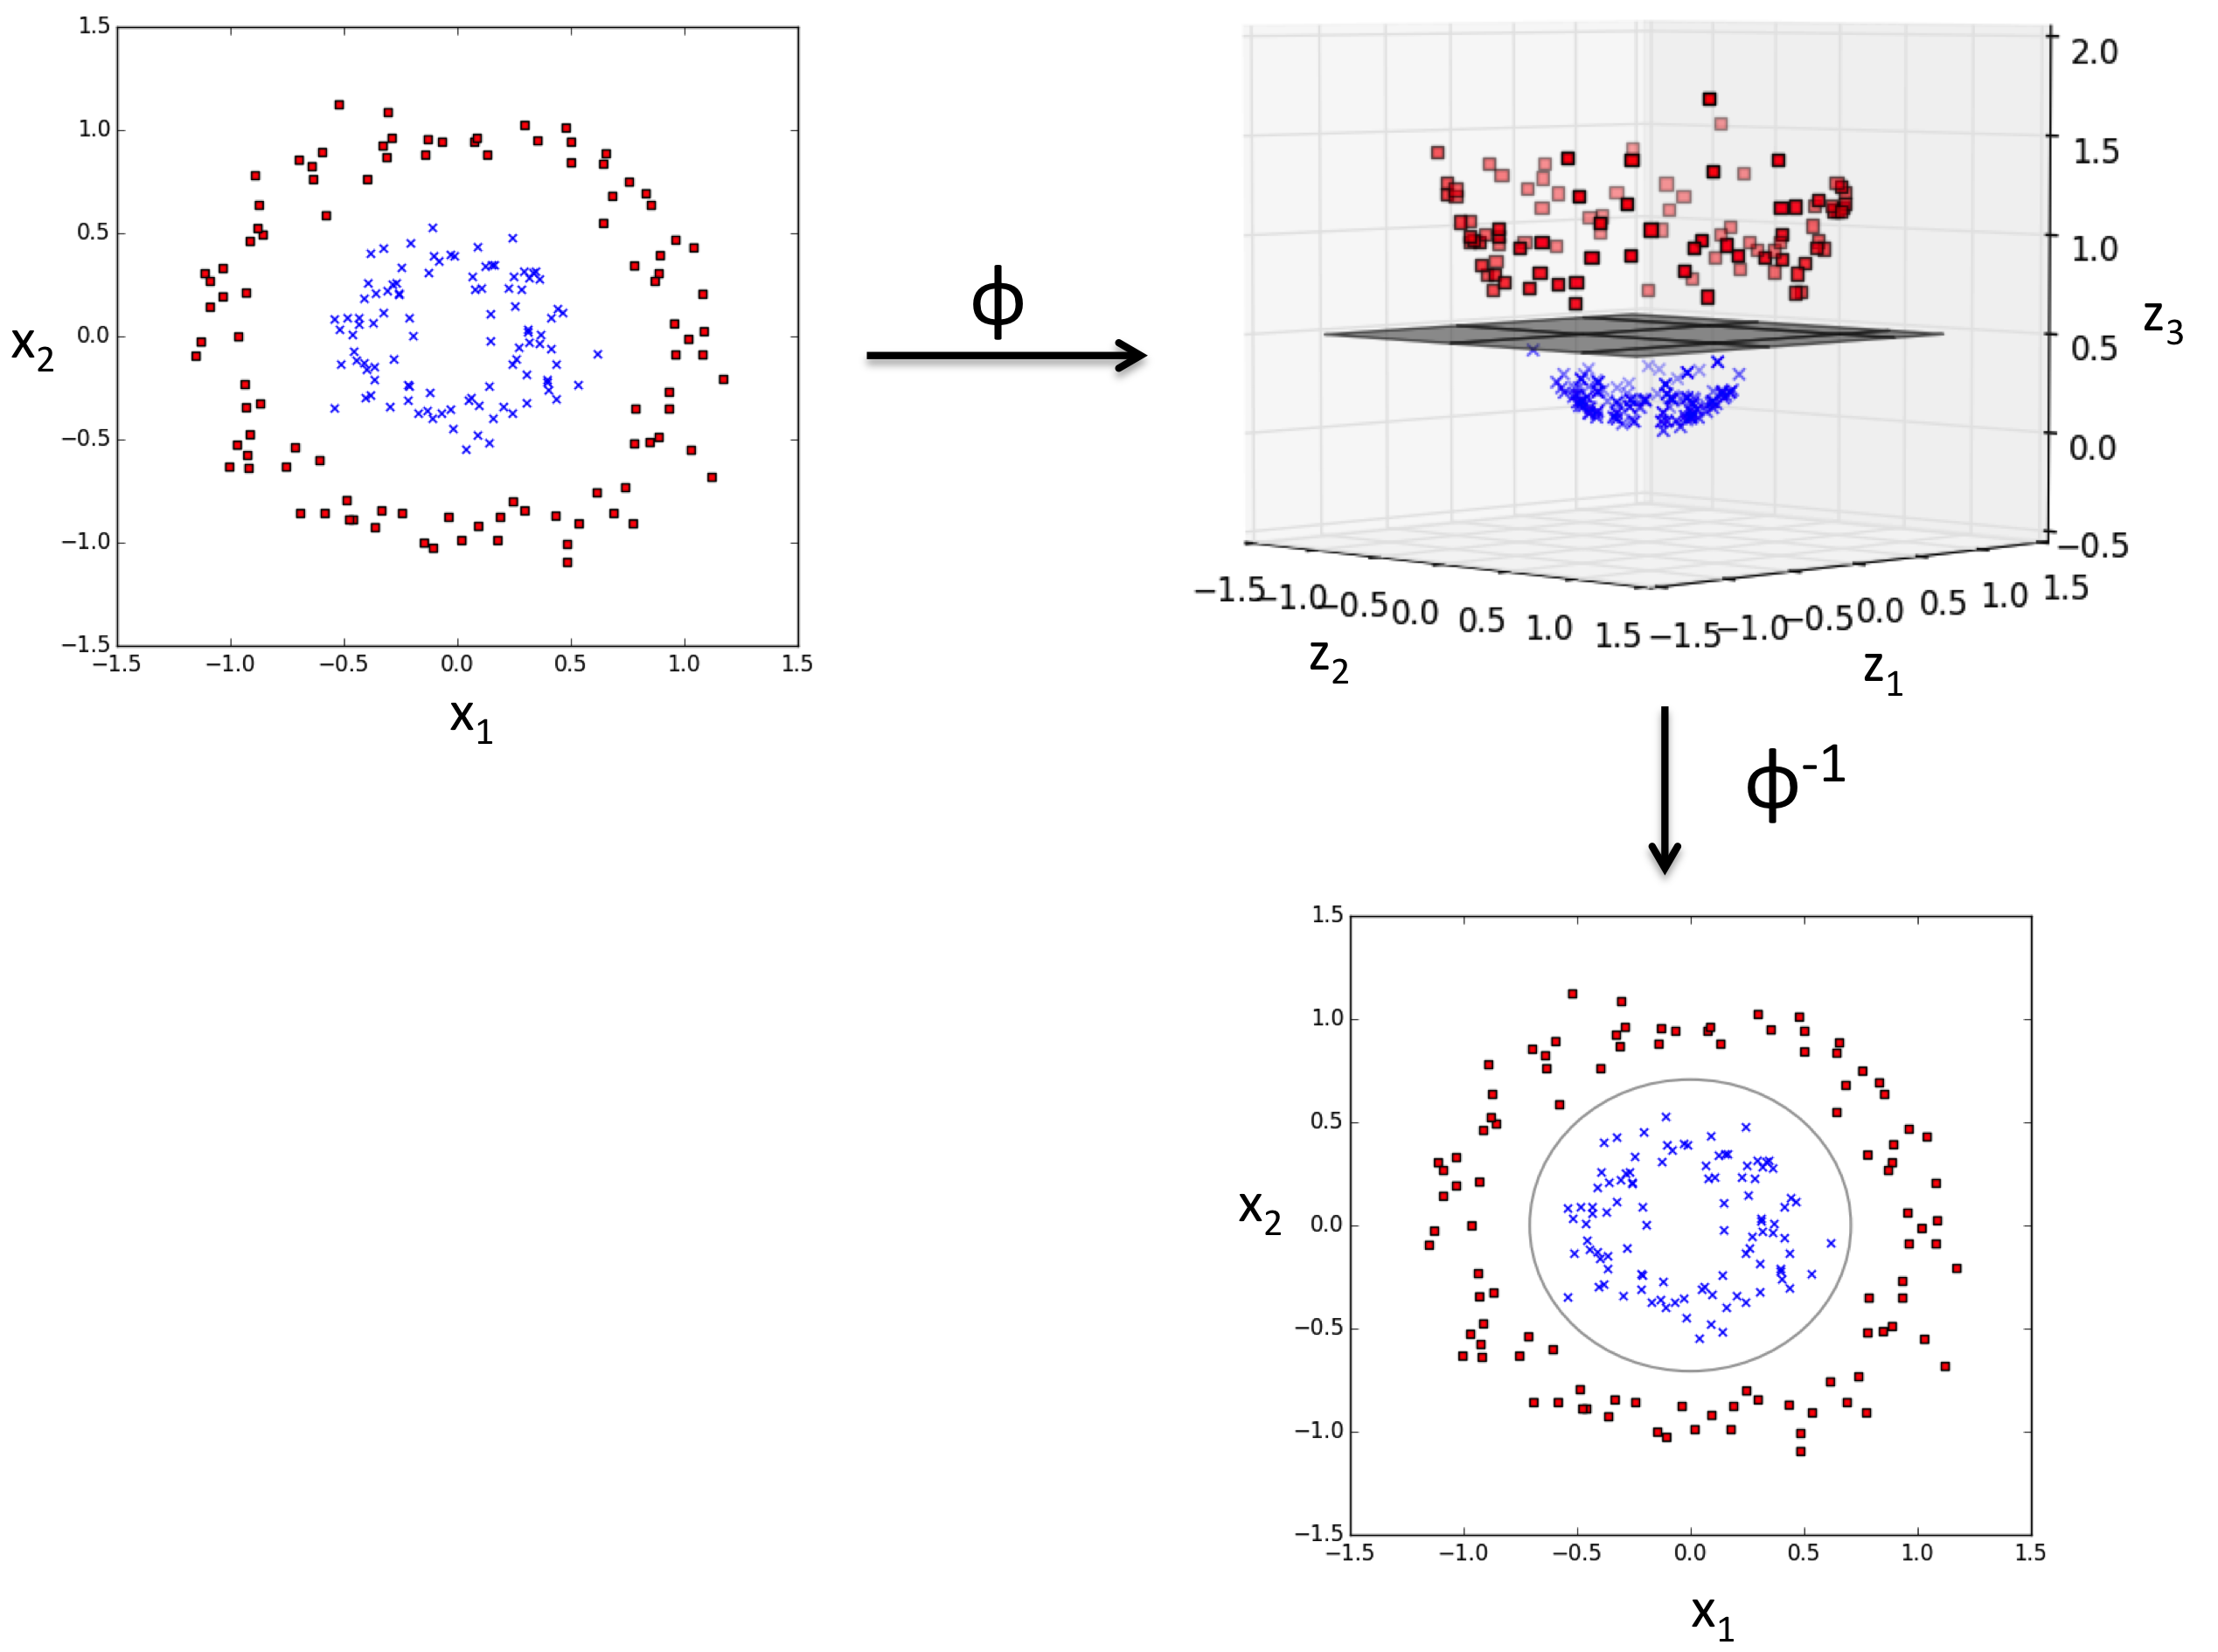

In [28]:
Image('img/03_13.png', width=500)

### 3.5.2 Using the kernel trick to find separating hyperplanes in higher dimensional space

Φ射影は, 計算コストが高い

&xrArr; **Kernel trick**

**kernel fn**

<!--Κ(xi, xj) = Φ(xi)^T^ Φ(xj)-->
$$\kappa(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^T \phi(x^{(j)})$$
(3.5.2)

kernel の1つ, **Radial Basis fn kernel** (動径基底関数kernel) (RBF kernel, Gaussian kernel)

<!--Κ(xi, xj) = exp(- ||xi - xj||^2 / 2σ^2)-->
$$\kappa(x^{(i)}, x^{(j)}) = exp(- \gamma ||x^{(i)} - x^{(j)}||^2)$$
(3.5.3)

<!--Κ(xi, xj) = exp(-γ||xi - xj||^2)-->
$$\kappa(x^{(i)}, x^{(j)}) = exp(-\gamma ||x^{(i)} - x^{(j)}||^2)$$
(3.5.4)

hyperparameter 
<!--γ = 1/2σ^2-->
$$\gamma = \frac{1}{2\sigma^2}$$

**kernel**: 2つのsample間の類似性を表すfn

- 1: 全く同じsample
- 0: 全く異なるsample

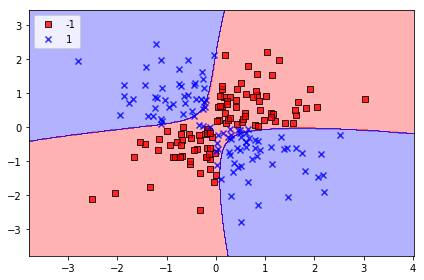

In [29]:
# RBF kernel による SVM のinstanceを生成
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

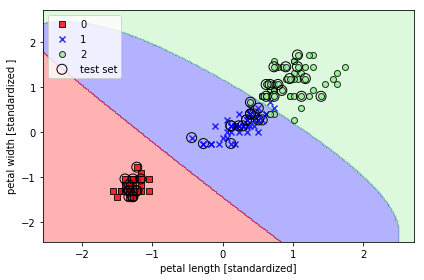

In [30]:
# RBF kernel のよる SVM の instance を生成 (2つのparameter を変更)
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized ]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

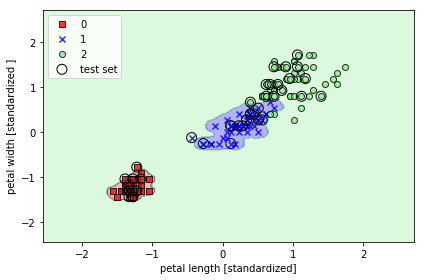

In [31]:
# RBF kernel のよる SVM の instance を生成 (γ を変更)
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized ]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 3.6 Decision tree learning

**decition tree**
: **Interpretablity** (意味解釈可能性) に配慮する場合のmodel

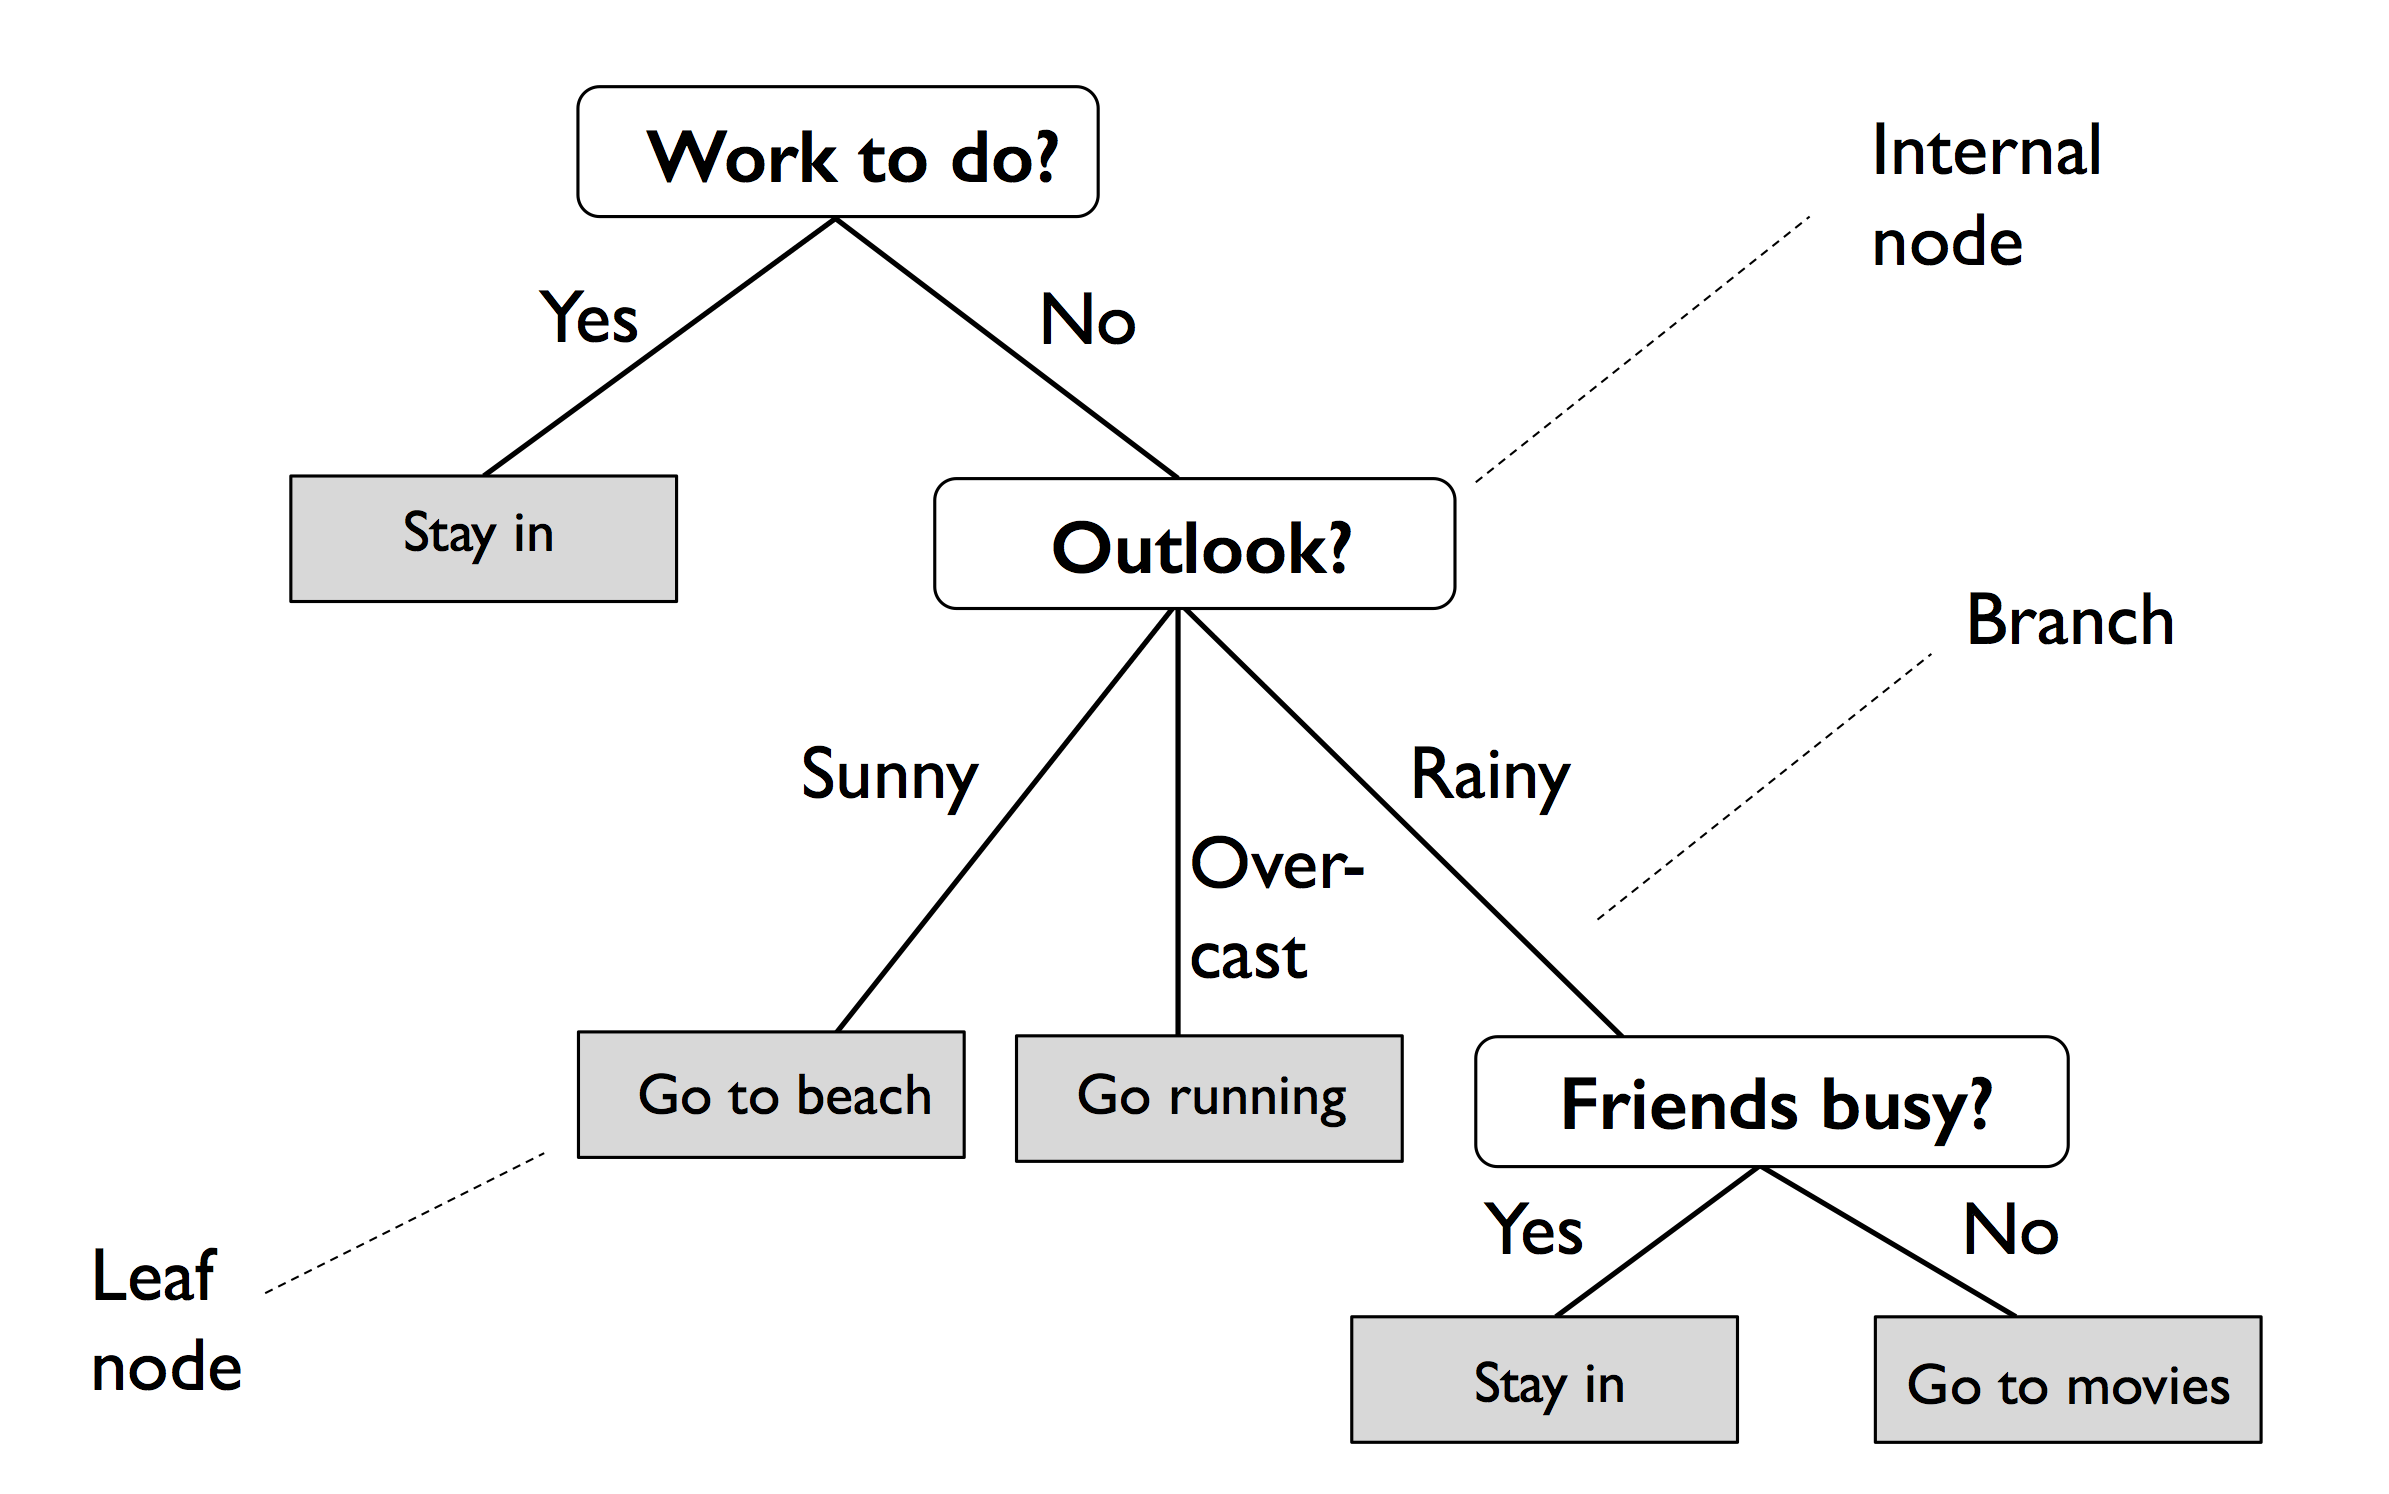

In [32]:
Image('img/03_17.png', width=500)

**Information gain** (情報利得: 分割された集合の要素についてのばらつきの減少) が最大となるfeatures でデータを分割する

### 3.6.1 Maximizing information gain - getting the most bang for the buck

<!--IG(Dp, f) = I(Dp) - ΣNj/Np I(Dj)-->
$$IG(D_p, f) = I(D_p) - \sum_{j=1}^m \frac{N_j}{N_p} I(D_j)$$
(3.6.1)

- *IG*: Information gain
- *f*: 分割を行うfeatures
- *Dp*: 親のdataset
- *Dj*: j-th の子　node のdataset
- *I*: Impority (不純度)
- *Np*: 親node の sample の総数
- *Nj*: j-th

(3.6.1)は, mコのnodeを対象に情報利得を定式化
多くの場合, binary DT

$D_{right}$, $D_{left}$ に分かれる

<!--IG(Dp, f) = I(Dp) - N~left~ / N~p~ I(D~left~) - N~right~/N~p~ I(D~right~)-->
$$IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{N_{right}}{N_p} I(D_{right})$$
(3.6.2)

binay DT でよく使われる Impurity index: 
1. **Gini impurity** (ジニ不純度) $I_G$
2. **Entropy** $I_H$
3. **Classification error** (分類誤差) $I_E$

###### entropy

def: entropy 
空でないclass i を対象に, 
p(i|t) ≠ 0


<!--I~H~(t) = - Σp(i|t)log~2~p(i|t)-->
$$I_H(t) = - \sum_{i=1}^c p(i|t) \log_2{p(i|t)}$$
(3.6.3)

$p(i|t)$:  node t において, class i に属するsampleの割合
given: sampleが同じclass に属している &rArr; entropy: 0


$$
\begin{cases}
p(i=1|t) = 1 | p(i=0|t) = 0 &\quad \Rightarrow &\quad entropy 0\\
p(i=1|t) = .5 | p(i=0|t) = .5 &\quad \Rightarrow &\quad entropy 1
\end{cases}
$$

###### Gini impurity

<!--I~G~(t) = Σp(i|t) (1-p(i|t)) = 1 - Σp(i|t)^2-->
$$I_G(t) = \sum_{i=1}^c p(i|t) (1 - p(i|t))\\
= 1 - \sum_{i=1}^c p(i|t)^2$$
(3.6.4)

given: binary (c=2)

<!--I~G~(t) = 1 - Σ0.5^2 = 0.5-->
$$I_G(t) = 1 - \sum_{i=1}^c 0.5^2 = 0.5$$
(3.6.5)

###### Classification Error

<!--I~E~(t) = 1 - max[p(i|t)]-->
$$I_E(t) = 1 - max(p(i|t))$$
(3.6.6)

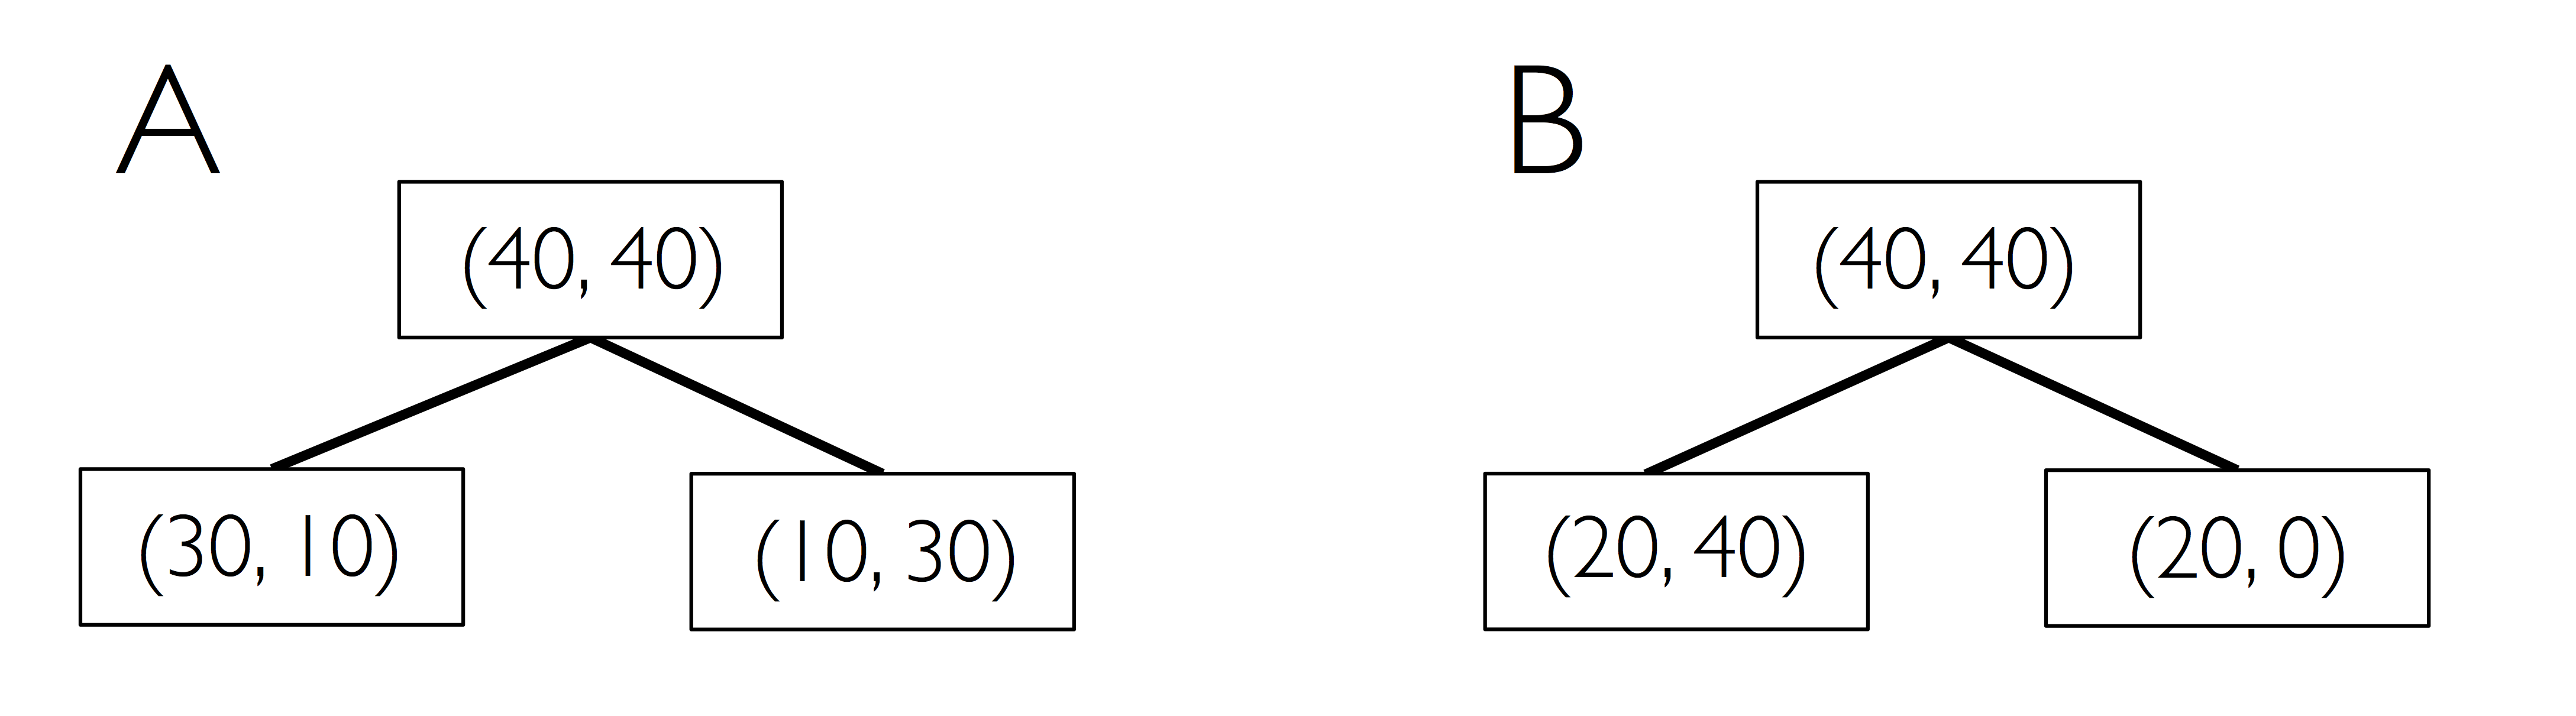

In [33]:
Image('img/03_18.png', width=500)

###### Classification Error

親nodeのimpurity:

$$I_E(D_p) = 1 - 0.5 = 0.5$$
(3.6.7)

senario A left impurity:

$$I_E(D_{left}) = 1 - \frac{3}{4} = 0.25$$
(3.6.8)

senario A right impurity:

$$I_E(D_{right}) = 1 - \frac{3}{4} = 0.25$$
(3.6.9)

senario A information gain:
$$IG_E = 0.5 - \frac{4}{8} \times 0.25 - \frac{4}{8} \times 0.25 = 0.25$$
(3.6.10)


senario B left impurity:

$$I_E(D_{left}) = 1 - \frac{4}{6} = \frac{1}{3}$$
(3.6.11)

senario B right impurity:

$$I_E(D_{right}) = 1 - 1 = 0$$
(3.6.12)

senario B information gain:

$$IG_E = 0.5 - \frac{6}{8} \times \frac{1}{3} = 0.25$$
(3.6.13)

###### Gini

(3.6.14)
(3.6.15)
(3.6.16)
(3.6.17)
(3.6.18)
(3.6.19)
(3.6.20)
...

###### Entropy

(3.6.21)
(3.6.22)
(3.6.23)
(3.6.24)
(3.6.25)
(3.6.26)
(3.6.27)
...

視覚化

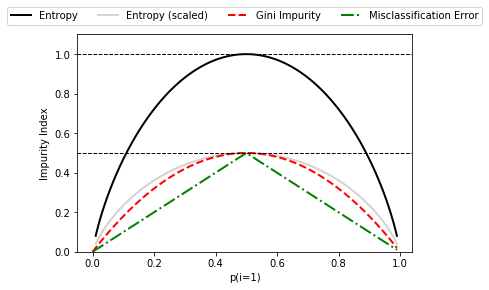

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# def: Gini impurity fn
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1 - p))

# def: Entropy fn
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1-p))

# def Classification error
def error(p):
    return 1 - np.max([p, 1 - p])

# 確率を表すarray を生成 (0 - 0.99 +0.01)
x = np.arange(0.0, 1.0, 0.01)

# calculate entropy, classification error
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

# plot
fig = plt.figure()
ax = plt.subplot(111)

# entropy, Gini, classification error loop
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)',
                         'Gini Impurity', 'Misclassification Error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
# legend 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=5, fancybox=True, shadow=False)

# horizontal broken line 
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

# axis y limit
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

### 3.6.2 Building a decision tree

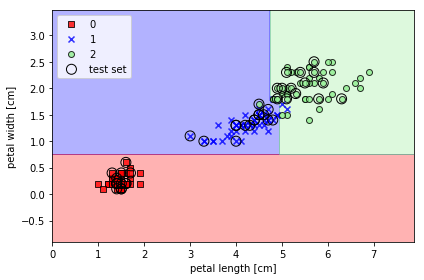

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Entropy を index をする DT の instance を生成
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# fit to training data
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree,
                     test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# $ pip install pydotplus

In [36]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                        filled=True,
                        rounded=True,
                        class_names=['Setosa', 'Versicolor', 'Virginica'],
                        feature_names=['petal length', 'petal width'],
                        out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('img/tree.png')

True

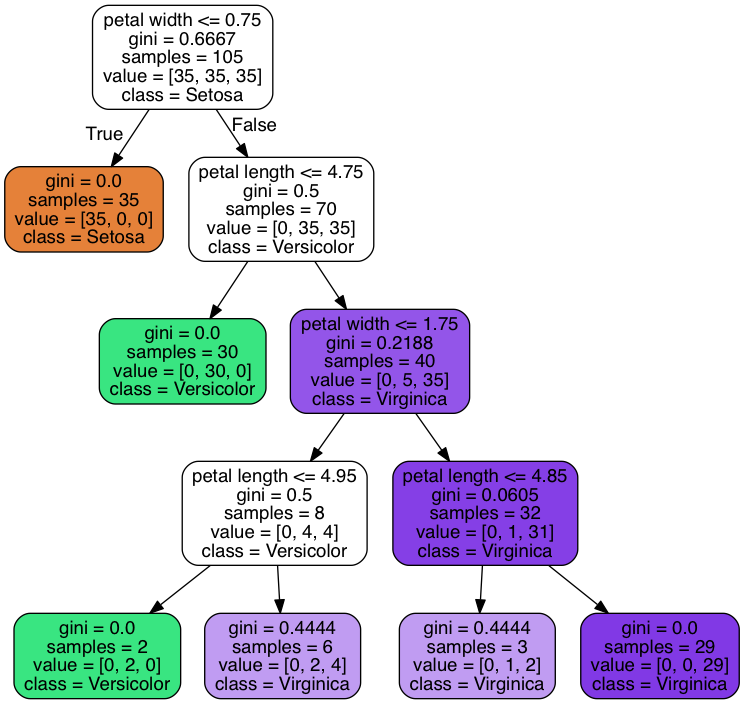

In [37]:
Image('img/03_21.png', width=500)

### 3.6.3 Combining weak to strong learners via random forests

**Random forest**: 
variance が高い, 複数のDTを平均化することで, よる汎化性能が高い頑健なmodelを構築

1. size n の random な bootstrap sample を復元抽出 (training data  から nコの sample を random に選択)
2. bootstrap sample から DT を成長させる: 各 node で
    1. dコの features を random に非復元抽出
    2. IG を最大化することにより, 目的fn に従って, 最適な分割となる features を使って node を分割
3. 1-2 をk回繰り返す
4. DT ごとの予測をまとめて, "多数決" にもとづいて, class label を割当て


> ---
> 
> - **sampling w/ replacement** (復元抽出)
> - **sampling w/o replacement** (非復元抽出)
> 
> ---

各分割の features の個数 d は, features 合計 m より小さく選択する必要
通常, 

<!--d = sqrt(m)-->
$d = \sqrt{m}$

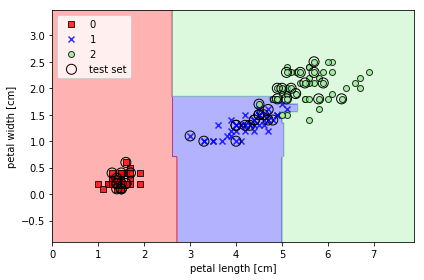

In [38]:
from sklearn.ensemble import RandomForestClassifier

# entropy index

forest = RandomForestClassifier(criterion='gini', 
                                n_estimators=25, random_state=1, n_jobs=2)

# fit to training data
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest,
                     test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- `n_estimators`
- `n_jobs`

## 3.7 K-nearest neighbors - a lazy learning algorithm

**k-nearest neighbor classifier** (**KNN**)

&isin; **Lazy learning**

> ---
> 
> ML algorithm: 
> - **Parametric model** 
>     - training dataset から parameter を推定
>     - e.g., perceptron, logistic reg, linear SVM
> - **Non-parametric model**
>     - 固定の parameter 集合; parameter の個数は training dataset とともに増加する
>     - e.g., decision tree/random forest, kernel SVM, KNN
>     
> **Instance-based L**
> &isin; Lazy L

KNN
1. k の値と距離指標を選択
2. 分類したい sample から kコの最近傍の data point を見つける
3. 多数決により class label を割当てる

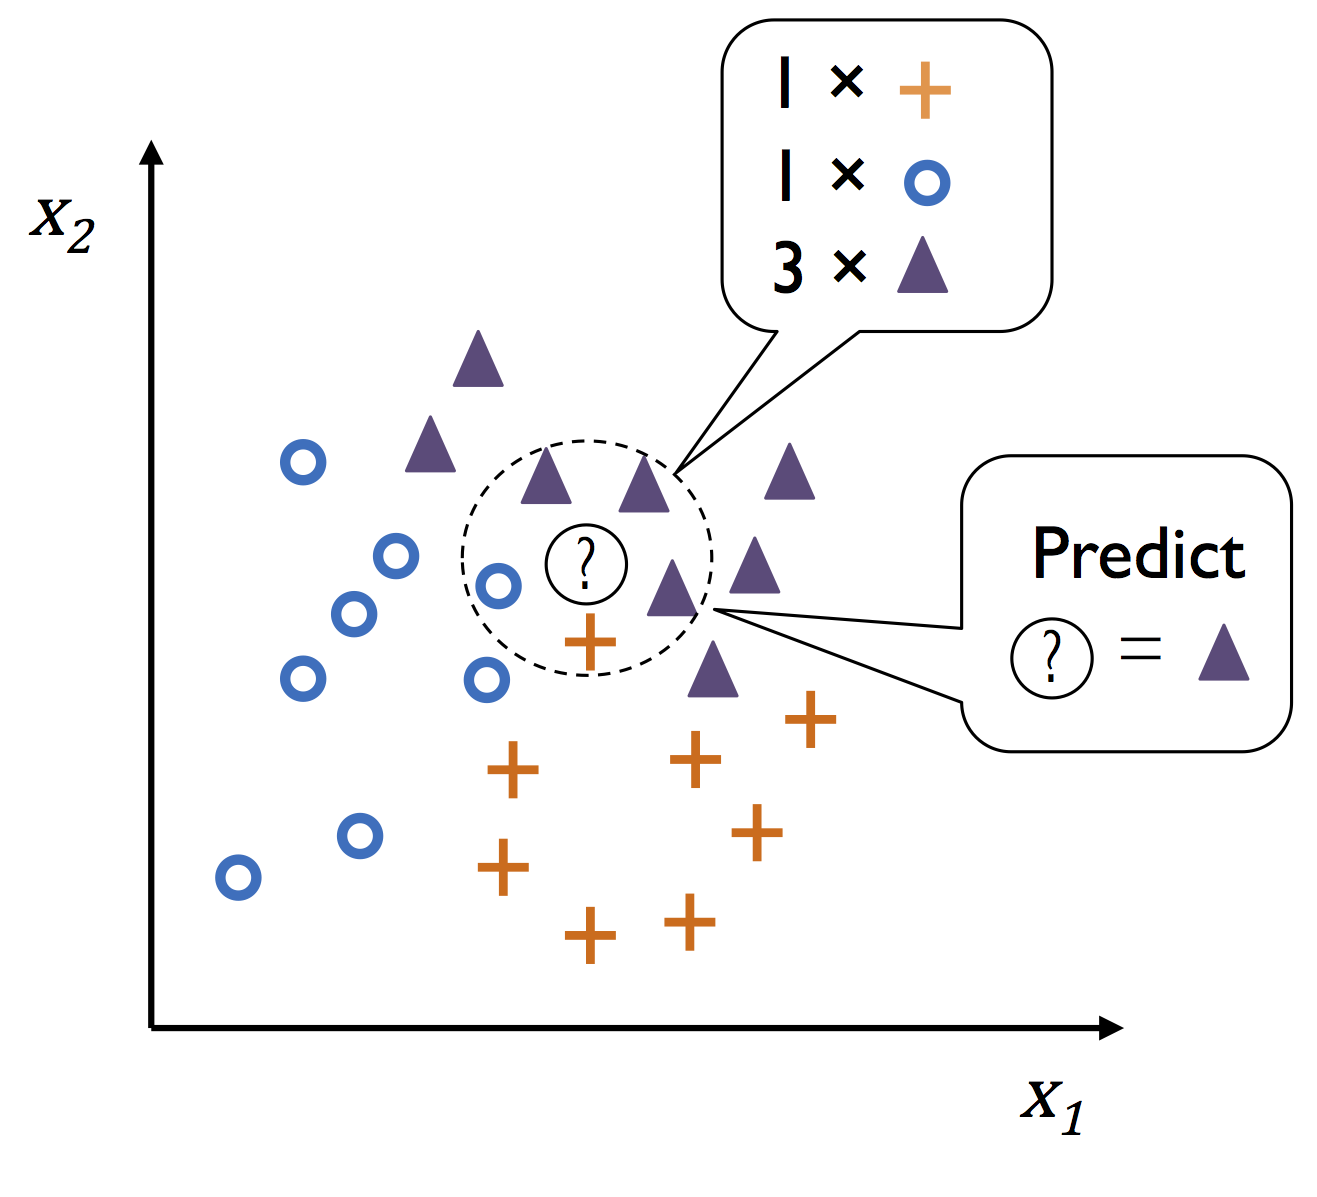

In [39]:
Image('img/03_23.png', width=500)

KNN &isin; **Memory-based learning**

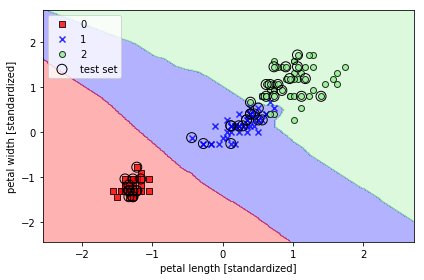

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# k-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn,
                     test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**minlowski**:

$$d(x^{(i)}, x^{(j)}) = \sqrt[p]{ \sum_k|x_k^{(i)} - x_k^{(j)}|^p }$$
(3.7.1)

> ---
> 
> **The curse of dimensionality**
> 
> ---

**Overview**

- [3.1 Chosing a classification algorithm](#3.1-Chosing-a-classification-algorithm)
- [3.2 First steps w/ scikit-learn](#3.2-First-steps-w/-scikit-learn)
- [3.3 Modeling class probabilisties via logistic regression](#3.3-Modeling-class-probabilisties-via-logistic-regression)
    - [3.3.1 Logistic regression intuition & conditional probabilities](#3.3.1-Logistic-regression-intuition-&-conditional-probabilities)
    - [3.3.2 Learning the weights of the logistic cost function](#3.3.2-Learning-the-weights-of-the-logistic-cost-function)
    - [3.3.3](#3.3.3)
    - [3.3.4 Training a logistic regression model w/ scikit-learn](#3.3.4-Training-a-logistic-regression-model-w/-scikit-learn)
    - [3.3.5 Tacking overfitting via regularization](#3.3.5-Tacking-overfitting-via-regularization)
- [3.4 Maximum margin classifcation w/ support vector machines](#3.4-Maximum-margin-classifcation-w/-support-vector-machines)
    - [3.4.1 Maximum margin intuition](#3.4.1-Maximum-margin-intuition)
    - [3.4.2 Dealing w/ the nonlinearly separable case using slack variables](#3.4.2-Dealing-w/-the-nonlinearly-separable-case-using-slack-variables)
- [3.5 Solving non-linear problems using a kernel SVM](#3.5-Solving-non-linear-problems-using-a-kernel-SVM)
    - [3.5.1](#3.5.1)
    - [3.5.2 Using the kernel trick to find separating hyperplanes in higher dimensional space](#3.5.2-Using-the-kernel-trick-to-find-separating-hyperplanes-in-higher-dimensional-space)
- [3.6 Decision tree learning](#3.6-Decision-tree-learning)
    - [3.6.1 Maximizing information gain - getting the most bang for the buck](#3.6.1-Maximizing-information-gain-getting-the-most-bang-for-the-buck)
    - [3.6.2 Building a decision tree](#3.6.2-Building-a-decision-tree)
    - [3.6.3 Combining weak to strong learners via random forests](#3.6.3-Combining-weak-to-strong-learners-via-random-forests)
- [3.7 K-nearest neighbors - a lazy learning algorithm](#3.7-K-nearest-neighbors---a-lazy-learning-algorithm)